In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,NaN,0.042485,1.97890,NaN,2.88660,NaN,NaN,NaN,NaN,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.4285,0.14333,1.19480,2.13180,0.98473,3.844500
2,NaN,0.217560,1.61050,NaN,NaN,1.21000,NaN,NaN,3.90290,1.51440,2.43890,NaN
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.6601,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,NaN,2.88220,NaN,3.20140,NaN,NaN,0.98475,3.10940,NaN,3.91720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,-4.729200,3.72580,NaN,NaN,0.35406,NaN,NaN,1.08500,0.15740,0.46504,NaN
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.0951,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.9254,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.9516,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	52
float64		column 2	66
float64		column 3	52
float64		column 4	78
float64		column 5	92
float64		column 6	78
float64		column 7	104
float64		column 8	92
float64		column 9	53
float64		column 10	92
float64		column 11	65
float64		column 12	118


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,348.000000,334.000000,348.000000,322.000000,308.000000,322.000000,296.000000,308.000000,347.000000,308.000000,335.000000,282.000000
mean,-0.035548,0.051432,2.069534,1.870420,1.983569,1.978625,2.024063,2.021721,1.959834,1.962080,1.973991,1.920750
std,2.585879,2.718730,1.134786,1.162921,1.144138,1.163452,1.150620,1.140116,1.154390,1.163671,1.161600,1.209835
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.016500,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.645848,-0.771620,1.141400,0.868675,0.958967,1.005397,1.060125,1.091525,1.003290,0.971590,0.909230,0.818715
50%,-0.047753,-0.009546,2.124100,1.757250,1.979150,1.992100,2.101400,2.119200,2.069100,2.017500,1.902000,1.915500
75%,0.787708,0.874713,3.001300,2.776975,3.016875,3.019025,2.958150,3.047825,2.935950,3.015550,3.023100,2.948800
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.978400,3.995000,3.985500,3.962700,3.967600,3.996000


<AxesSubplot:>

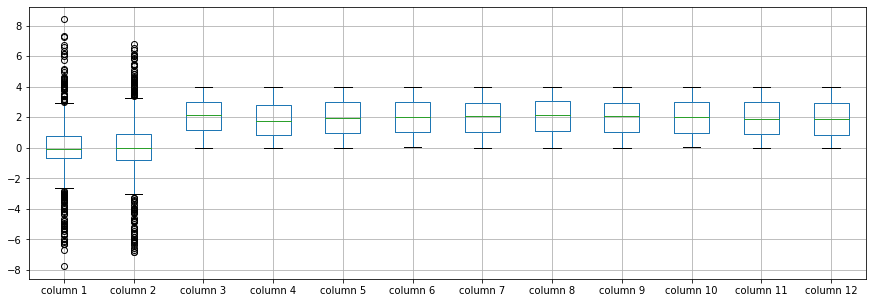

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.035548
column 2     0.051432
column 3     2.069534
column 4     1.870420
column 5     1.983569
column 6     1.978625
column 7     2.024063
column 8     2.021721
column 9     1.959834
column 10    1.962080
column 11    1.973991
column 12    1.920750
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.011352,-0.059220,-0.006726,0.041434,0.037244,0.000499,0.038515,-0.033386,0.008719,0.107055,-0.020535
column 2,-0.011352,1.000000,-0.032548,0.025408,-0.035887,-0.029039,0.008932,-0.023242,0.028840,-0.045139,-0.000778,0.024846
column 3,-0.059220,-0.032548,1.000000,0.031134,-0.031446,-0.073897,-0.092261,0.138237,0.084527,-0.098967,-0.113237,-0.036758
column 4,-0.006726,0.025408,0.031134,1.000000,0.068056,0.089643,0.000296,0.103869,0.010882,0.095291,0.013524,-0.083027
column 5,0.041434,-0.035887,-0.031446,0.068056,1.000000,0.094800,0.045470,-0.091175,-0.082410,0.033657,-0.022877,-0.008977
column 6,0.037244,-0.029039,-0.073897,0.089643,0.094800,1.000000,0.060256,0.042442,-0.026374,0.031189,-0.004463,-0.072275
column 7,0.000499,0.008932,-0.092261,0.000296,0.045470,0.060256,1.000000,-0.052597,0.025142,0.018467,-0.000490,-0.047013
column 8,0.038515,-0.023242,0.138237,0.103869,-0.091175,0.042442,-0.052597,1.000000,0.055226,-0.136312,-0.059281,0.012370
column 9,-0.033386,0.028840,0.084527,0.010882,-0.082410,-0.026374,0.025142,0.055226,1.000000,-0.023997,-0.057044,0.100896
column 10,0.008719,-0.045139,-0.098967,0.095291,0.033657,0.031189,0.018467,-0.136312,-0.023997,1.000000,0.000983,0.049621


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+45,12+45+45,12+45+45+45,12+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45,12+45+45+45,12+45+45,12+45,12], vae_layer = False, seed = 45)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.440184173583983
Epoch: 1 , loss: 22.30249656677246
Epoch: 2 , loss: 22.279325714111327
Epoch: 3 , loss: 22.11119400024414
Epoch: 4 , loss: 21.642601242065428
Epoch: 5 , loss: 19.75865379333496
Epoch: 6 , loss: 19.138303680419924
Epoch: 7 , loss: 18.626630859375
Epoch: 8 , loss: 18.6717813873291
Epoch: 9 , loss: 18.51483413696289
Epoch: 10 , loss: 18.228478622436523
Epoch: 11 , loss: 18.09643119812012
Epoch: 12 , loss: 17.913580017089842
Epoch: 13 , loss: 17.832451858520507
Epoch: 14 , loss: 17.85364227294922
Epoch: 15 , loss: 17.646305351257325
Epoch: 16 , loss: 17.442551574707032
Epoch: 17 , loss: 17.440710487365724
Epoch: 18 , loss: 17.259832649230958
Epoch: 19 , loss: 16.90683319091797
Epoch: 20 , loss: 17.134770622253416
Epoch: 21 , loss: 16.975381240844726
Epoch: 22 , loss: 16.6522855758667
Epoch: 23 , loss: 16.54774913787842
Epoch: 24 , loss: 16.576080474853516
Epoch: 25 , loss: 16.36002700805

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2    -0.010263
column 3     1.058100
column 4     1.238106
column 5     2.148600
column 6     1.355841
column 7     1.322715
column 8     2.227200
column 9     1.943500
column 10    1.306168
column 11    2.470700
column 12    1.227248
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.161283,0.000000,0.0,-0.031845,0.000000,-0.547905,1.709059,-1.178901,1.114866,0.00000,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
2,1.094435,0.000000,0.0,-0.611312,-2.987615,0.000000,-3.184091,-1.444151,0.000000,0.00000,0.0,0.089550
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
4,0.000000,1.008067,0.0,-0.841662,0.000000,-2.617764,-0.789245,0.000000,0.000000,-2.92249,0.0,-0.234924
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.854671,0.000000,0.0,-2.791927,0.089737,0.000000,-0.632973,-2.338835,0.000000,0.00000,0.0,-1.949916
396,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
397,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
398,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(53.09603972106571, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.32519498666840424

In [18]:
new_df.iloc[66,:]

column 1    -0.015621
column 2     0.267760
column 3     1.536738
column 4     1.187200
column 5     1.431055
column 6     2.583000
column 7     1.506081
column 8     3.074200
column 9     1.538100
column 10    1.448200
column 11    0.853340
column 12    1.346608
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.047403,0.042485,1.97890,1.804455,2.886600,1.921695,1.924469,1.911099,1.898296,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.434300,3.129900,1.277800,1.428500,0.143330,1.194800,2.13180,0.98473,3.844500
2,-0.020965,0.217560,1.61050,0.725788,0.780585,1.210000,0.812209,0.773149,3.902900,1.51440,2.43890,0.723130
3,-0.539160,-0.061874,0.36486,0.332780,0.190270,0.567160,1.660100,2.352700,0.661260,3.13510,3.93810,3.734600
4,-0.268400,0.002067,2.88220,0.719938,3.201400,0.759636,0.733355,0.984750,3.109400,0.73391,3.91720,0.712136
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.012429,-4.729200,3.72580,0.912873,0.972427,0.354060,0.994827,0.955165,1.085000,0.15740,0.46504,0.901484
396,0.264630,-6.107600,3.90540,1.337700,1.418700,1.686100,1.095100,3.793600,0.127900,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.772100,2.550900,1.470100,0.925400,1.841100,3.477300,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.396550,2.999000,3.410100,2.951600,0.278000,0.990590,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AE_20(imp).xlsx", index=False, header=False)